### Importing libraries

In [644]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import RFE
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Explore the data

In [470]:
df = pd.read_excel("/Users/praga/Downloads/AirQualityUCI/AirQualityUCI.xlsx")

In [471]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [472]:
df.shape

(9357, 15)

In [473]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

It has no null values.

In [474]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [475]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [476]:
quality= df.copy().select_dtypes(['int','float'])
quality.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


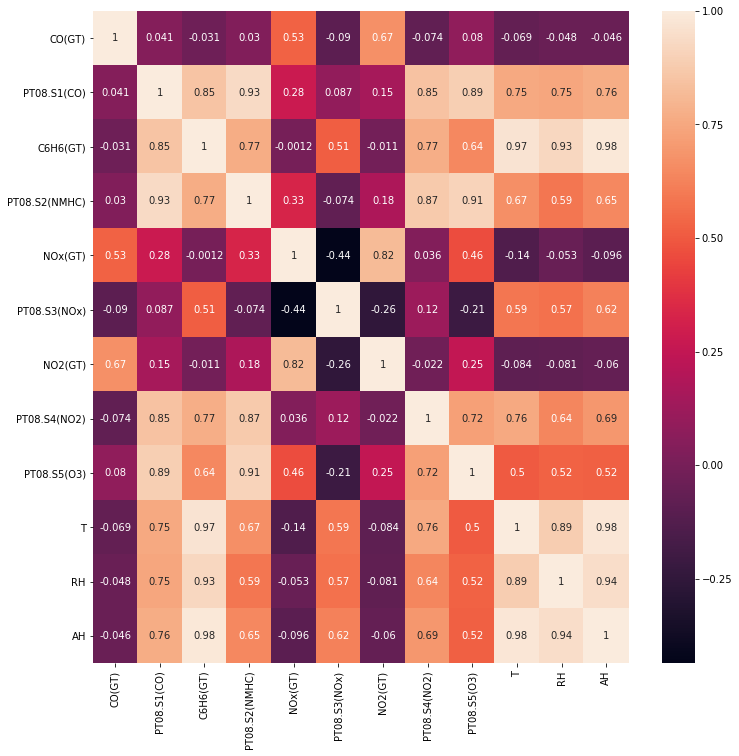

In [478]:
corrmat= quality.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(corrmat, annot=True,linecolor='blue')

### Data Description 

0 Date	(DD/MM/YYYY) 

1 Time	(HH.MM.SS) 

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer) 

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in °C	

13 Relative Humidity (%) 

14 AH Absolute Humidity 

### Regression

#### Feature preparation

We are selecting the optimum features using Recursive Feature Elimination.

In [552]:
df=df.select_dtypes(['int','float'])
x=df.drop(['AH'],axis=1)
y=df['AH']
def rfe(model,n_features):
    rfe = RFE(model ,n_features)
    rfe=rfe.fit(x,y)
    #print(rfe.ranking_)
    ranking=rfe.ranking_
    col=df.columns.drop(["AH"])
    cols=[]

    i=0
    for rank in ranking:
        if rank == 1:
            cols.append(col[i])
            i+=1
        else:
            i+=1
    return cols

In [553]:
lr=LinearRegression()
new_features=[]
rmses=[]
for n in range(2,12,1):
    features= rfe(lr,n)
    new_features.append(features)
new_features

[[u'C6H6(GT)', u'T'],
 [u'C6H6(GT)', u'T', u'RH'],
 [u'C6H6(GT)', u'PT08.S2(NMHC)', u'T', u'RH'],
 [u'C6H6(GT)', u'PT08.S2(NMHC)', u'PT08.S4(NO2)', u'T', u'RH'],
 [u'C6H6(GT)', u'PT08.S2(NMHC)', u'NO2(GT)', u'PT08.S4(NO2)', u'T', u'RH'],
 [u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'PT08.S5(O3)',
  u'T',
  u'RH'],
 [u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'PT08.S5(O3)',
  u'T',
  u'RH'],
 [u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'PT08.S5(O3)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'PT08.S5(O3)',
  u'T',
  u'RH']]

In [554]:
for features in new_features:
    x=df[features]
    y=df['AH']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    rmse= mean_squared_error(y_pred,y_test)**(0.5)
    rmses.append(rmse)
rmses

[5.449742422517791,
 3.7465698479753256,
 1.2375300546547994,
 1.0856909217573094,
 1.0806330361052736,
 1.0033375569223,
 0.9955782163516379,
 0.9903639516038276,
 0.9914082971298332,
 0.9911803511663583]

Text(0,0.5,u'Rmse')

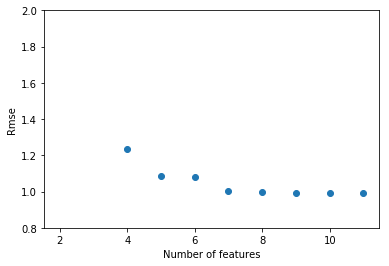

In [555]:
n=range(2,12,1)
plt.scatter(n,rmses)
plt.ylim(0.8,2)
plt.xlabel("Number of features")
plt.ylabel("Rmse")

In [556]:
print"Number of optimal features to be selected is:",(rmses.index(0.9903639516038276)+2)
print"Least error possible in Linear Regression is:",min(rmses)
print"The optimal features are:",list(new_features[7])

Number of optimal features to be selected is: 9
Least error possible in Linear Regression is: 0.9903639516038276
The optimal features are: [u'C6H6(GT)', u'PT08.S2(NMHC)', u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)', u'PT08.S4(NO2)', u'PT08.S5(O3)', u'T', u'RH']


In [557]:
x=df[new_features[7]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lr.fit(X_train,y_train)
rmse_lr={}
for cv in range(2,25,1):
    y_pred=cross_val_predict(lr,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_lr[cv]=r
rmse_lr

{2: 0.9966909782588044,
 3: 0.9928570161323775,
 4: 0.9914595827246543,
 5: 0.9914146237799869,
 6: 0.9900814702353977,
 7: 0.9904443886546913,
 8: 0.9899643603988364,
 9: 0.9906509477231188,
 10: 0.9902434586906752,
 11: 0.9902834848941978,
 12: 0.9899536396653897,
 13: 0.9909790064403132,
 14: 0.9920189034708066,
 15: 0.9895818670055563,
 16: 0.9906832680496677,
 17: 0.9908724286854248,
 18: 0.9899271514547497,
 19: 0.9893850875265847,
 20: 0.9899566740827168,
 21: 0.990235305545404,
 22: 0.9900097163386852,
 23: 0.9900759652635851,
 24: 0.9895809956846714}

Text(0.5,0,u'Cross_val')

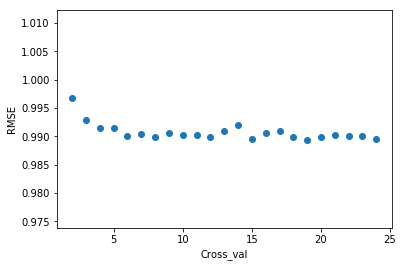

In [558]:
cv=range(2,25,1)
plt.scatter(cv,rmse_lr.values())
plt.ylabel("RMSE")
plt.xlabel("Cross_val")

In [559]:
min(rmse_lr.values())

0.9893850875265847

Lets use a different model to reduce the error.

### Random Forest Regressor

In [645]:
rand= RandomForestRegressor()
new_features_rand=[]
rmses_rand=[]
for n in range(2,11,1):
    features= rfe(rand,n)
    new_features_rand.append(features)
new_features_rand

[[u'C6H6(GT)', u'PT08.S3(NOx)'],
 [u'C6H6(GT)', u'PT08.S2(NMHC)', u'PT08.S3(NOx)'],
 [u'PT08.S1(CO)', u'C6H6(GT)', u'PT08.S2(NMHC)', u'PT08.S3(NOx)'],
 [u'PT08.S1(CO)', u'C6H6(GT)', u'PT08.S2(NMHC)', u'PT08.S3(NOx)', u'NO2(GT)'],
 [u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)']]

In [646]:
for features in new_features_rand:
    x=df[features]
    y=df['AH']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    rand.fit(X_train,y_train)
    y_pred=rand.predict(X_test)
    rmse = mean_squared_error(y_pred,y_test)**(0.5)
    rmses_rand.append(rmse)
rmses_rand

[0.4095087521810059,
 0.41023660390624844,
 0.38296122601443583,
 0.24273940866649443,
 0.22663042540523412,
 0.2148220305588682,
 0.2149131318980481,
 0.21356476968633592,
 0.2159723765289394]

In [647]:
min(rmses_rand)

0.21356476968633592

Text(0,0.5,u'Rmse')

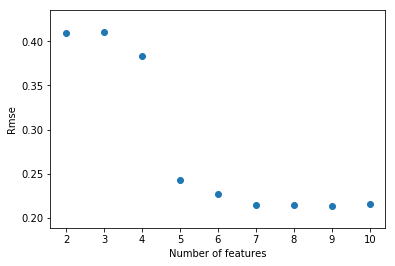

In [648]:
n=range(2,11,1)
plt.scatter(n,rmses_rand)
plt.xlabel("Number of features")
plt.ylabel("Rmse")

In [650]:
print"Number of optimal features to be selected is:",(rmses_rand.index(min(rmses_rand))+2)
print"Least error possible in Random Forest Regression is:",min(rmses_rand)


Number of optimal features to be selected is: 9
Least error possible in Random Forest Regression is: 0.21356476968633592


#### Cross validation in Random forest

A model with 5 features

In [672]:
x=df[new_features_rand[3]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.27028889770587217,
 6: 0.26197222481900206,
 10: 0.2583975696548685,
 14: 0.2568987429139385,
 18: 0.2573187406290919,
 22: 0.26110975037021944,
 26: 0.25881711246133376,
 30: 0.25889146661394763,
 34: 0.26070202137771076,
 38: 0.2605282984099356,
 42: 0.25811581337279954,
 46: 0.2583137044537848}

Text(0,0.5,u'Rmse')

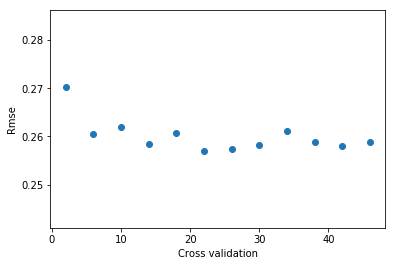

In [673]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [674]:
f_5=min(rmse_rand.values())
f_5

0.2568987429139385

Lets use a model which has 6 features

In [675]:
x=df[new_features_rand[4]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.2505441702116246,
 6: 0.24461807862002338,
 10: 0.24161475150952533,
 14: 0.2399660272886154,
 18: 0.2476298393406438,
 22: 0.24310095150818267,
 26: 0.24268028211394432,
 30: 0.24421921212136463,
 34: 0.2414139553600165,
 38: 0.24451799275400027,
 42: 0.2424536940656046,
 46: 0.24537108920505388}

Text(0,0.5,u'Rmse')

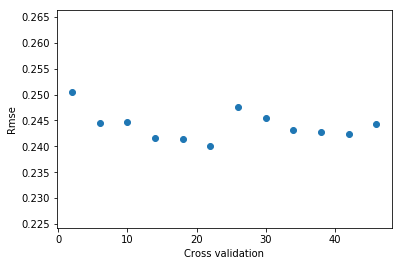

In [676]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [677]:
f_6=min(rmse_rand.values())
f_6

0.2399660272886154

Now, a model with 7 features.

In [678]:
x=df[new_features_rand[5]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand


{2: 0.2483119723293204,
 6: 0.23753399189711116,
 10: 0.23652353948541158,
 14: 0.2352299501252565,
 18: 0.2330130998902951,
 22: 0.23432493083585576,
 26: 0.23629611950395152,
 30: 0.23146583322611877,
 34: 0.23082976119032675,
 38: 0.23226928507119884,
 42: 0.2360878356726582,
 46: 0.23056281841484072}

Text(0,0.5,u'Rmse')

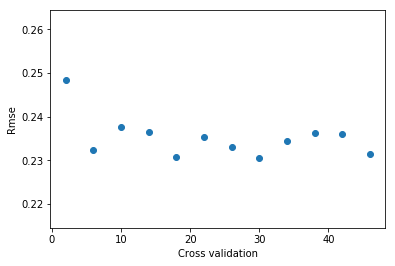

In [679]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [680]:
f_7=min(rmse_rand.values())
f_7

0.23056281841484072

A model with 8 features.

In [681]:
x=df[new_features_rand[6]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.2470666350988271,
 6: 0.2373944878728833,
 10: 0.2361655690260982,
 14: 0.2332971408300827,
 18: 0.23415485227902,
 22: 0.2337114641032076,
 26: 0.23717853475175896,
 30: 0.23550815643725181,
 34: 0.23287355775582322,
 38: 0.23630100859492462,
 42: 0.23320809832209216,
 46: 0.2376905323484377}

Text(0,0.5,u'Rmse')

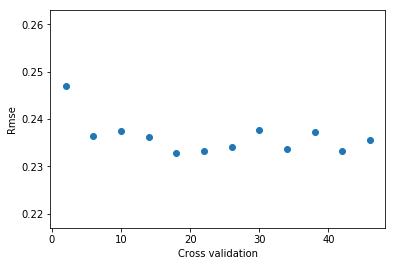

In [682]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [683]:
f_8=min(rmse_rand.values())
f_8

0.23287355775582322

A model with 9 features.

In [684]:
x=df[new_features_rand[7]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.2483840034167059,
 6: 0.23656890132430528,
 10: 0.23576371999415746,
 14: 0.23193802962436066,
 18: 0.23513952746255007,
 22: 0.23646213928555918,
 26: 0.23498901676612916,
 30: 0.23288553910966434,
 34: 0.2354154445379069,
 38: 0.23450889421590396,
 42: 0.235824048736344,
 46: 0.23413151124241763}

Text(0,0.5,u'Rmse')

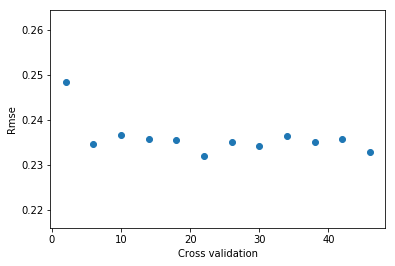

In [685]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [686]:
f_9=min(rmse_rand.values())
f_9

0.23193802962436066

Text(0,0.5,u'Number of Features')

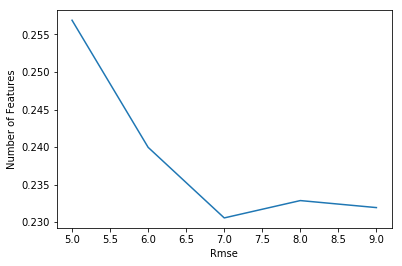

In [688]:
vals=[f_5,f_6,f_7,f_8,f_9]
ftrs=range(5,10,1)
plt.plot(ftrs,vals)
plt.xlabel("Rmse")
plt.ylabel("Number of Features")

In [689]:
f_7

0.23056281841484072

From the above models, we are getting least error when we use a model with 7 features and we are getting error of 0.2305.

In [663]:
df['AH'].describe()

count    9357.000000
mean       -6.837604
std        38.976670
min      -200.000000
25%         0.692275
50%         0.976823
75%         1.296223
max         2.231036
Name: AH, dtype: float64